In [1]:
import warnings

warnings.filterwarnings('ignore')


# **Proyecto 2 : Análisis de señales ECG**

## Andres Banquez- Melina Villada

1. De los artículos:

https://www.nature.com/articles/s41746-023-00966-w

https://www.nature.com/articles/s41598-020-59821-7

https://www.sciencedirect.com/science/article/pii/S2405844024032316

Para cada artículo hacer un diagrama de flujo de las metodologías usadas en los artículos (10%)

Explicar en sus palabras las metodologías desarrolladas (10%)



*Prediction of atrial fibrillation from at-home single-lead ECG signals without arrhythmias*

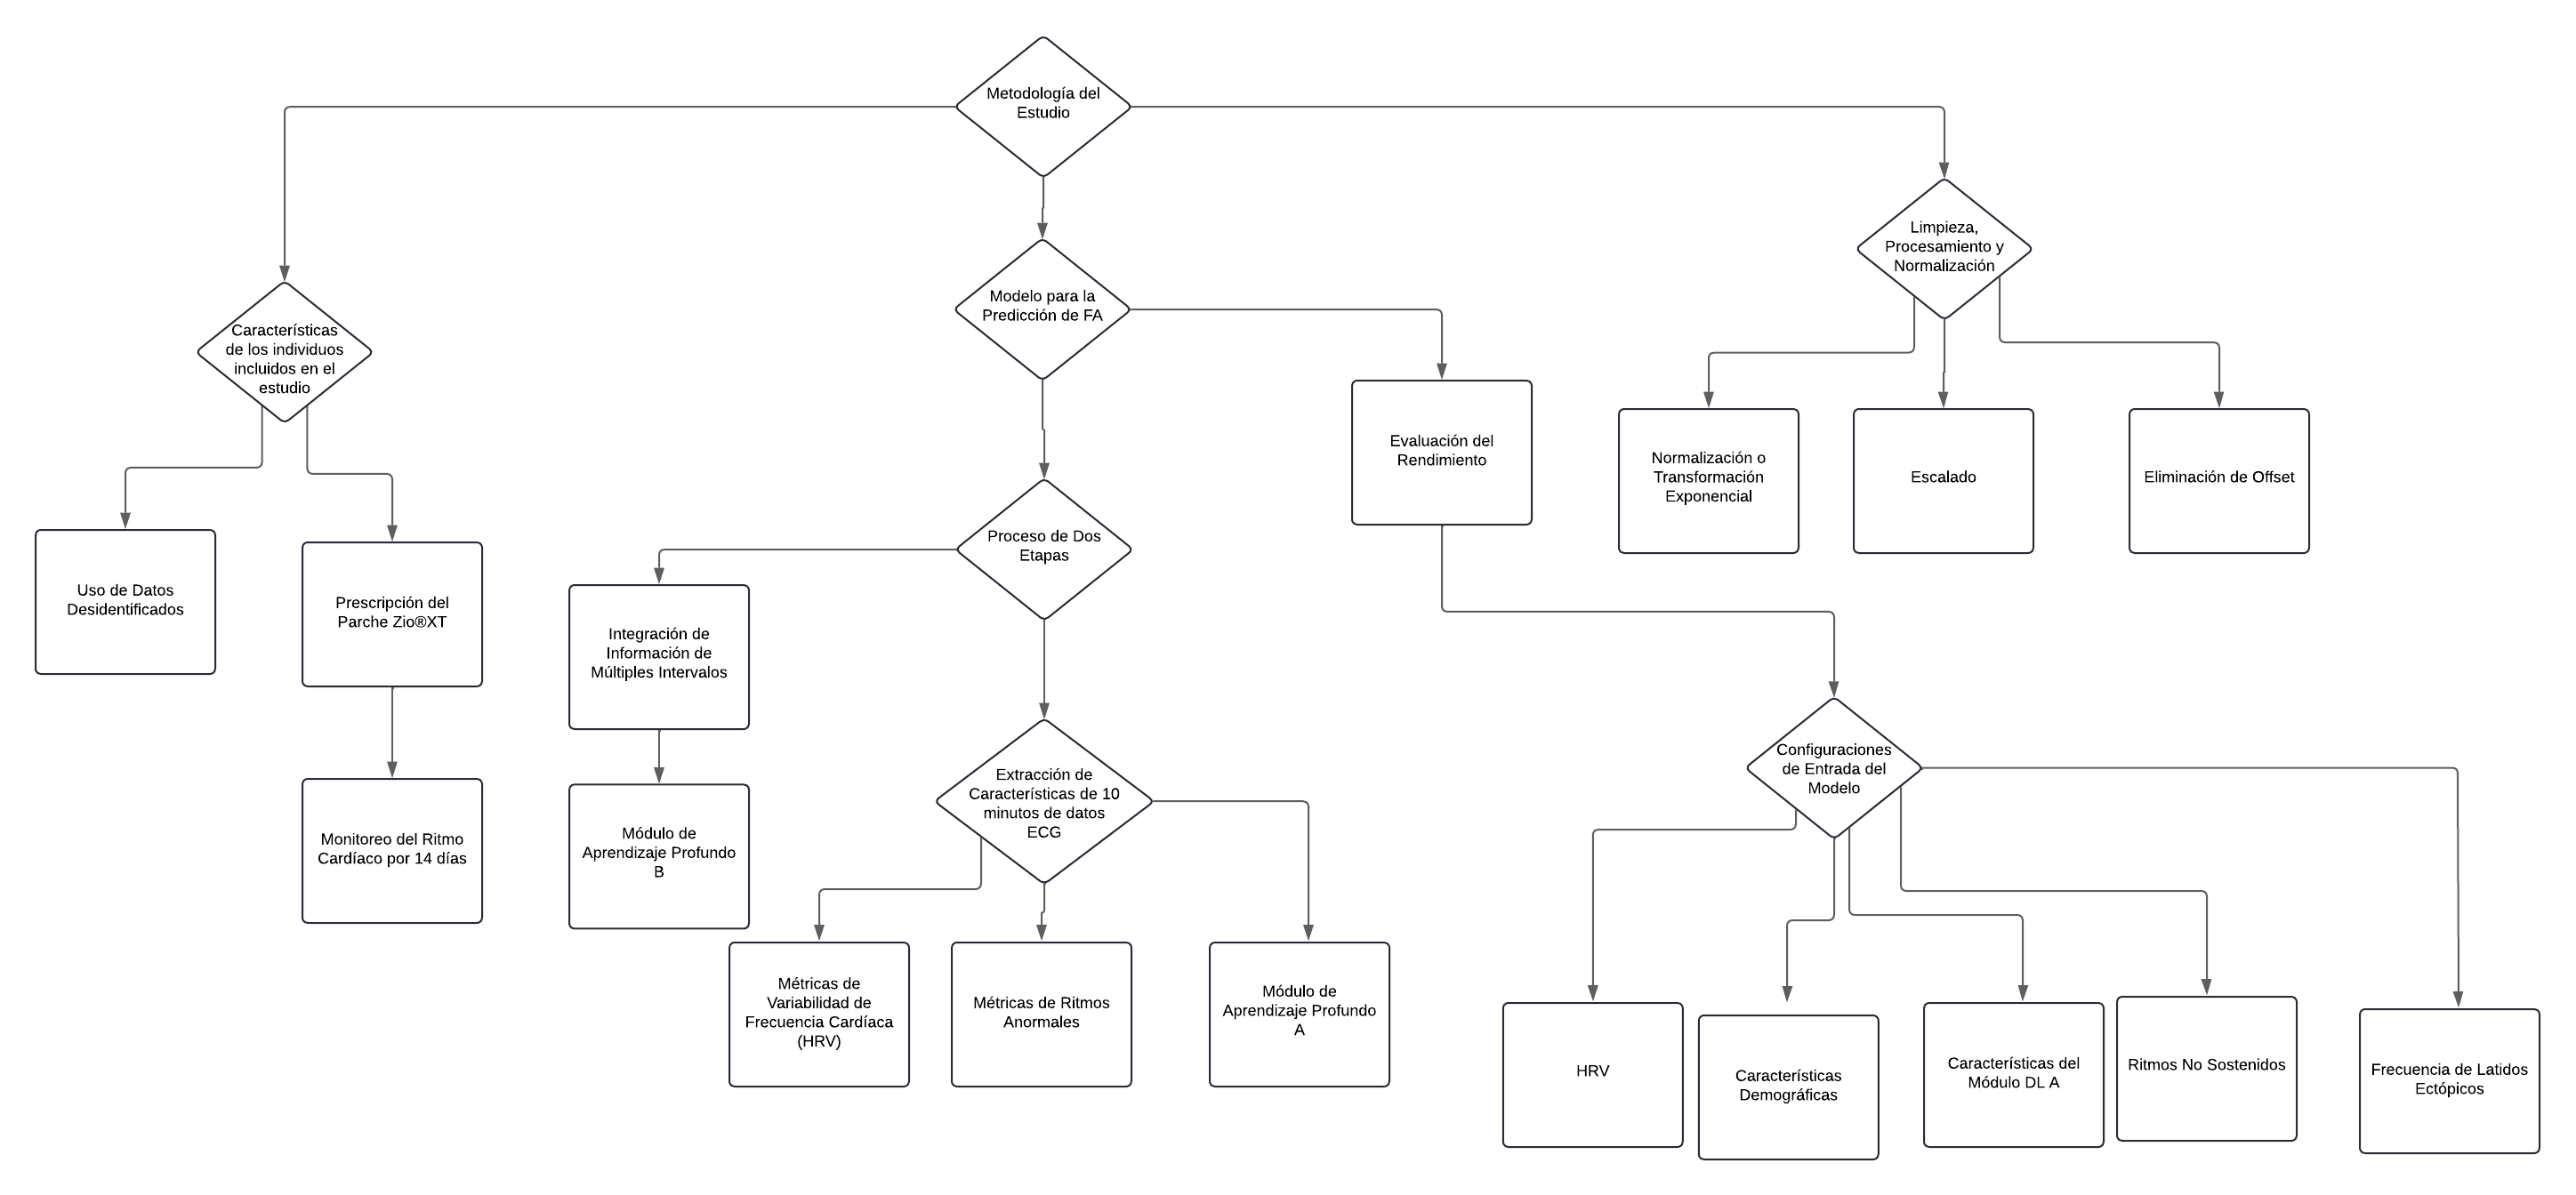

El artículo describe la metodología para predecir la fibrilación auricular a partir de señales ECG de una sola derivación. Para ello se utilizaron 459 889 grabaciones obtenidas mediante parches ambulatorios durante un período de hasta 14 días. La idea era obtener diversas características de las señales ECG incluyendo datos demográficos como edad y género, métricas estándar de la variabilidad de la frecuencia cardíaca (HRV). Además, se utilizó un módulo de aprendizaje profundo (DL módulo A) para extraer automáticamente características morfológicas del ECG.

Las grabaciones de ECG se dividieron en intervalos de 10 minutos, y las características extraídas de cada intervalo se integraron en un modelo de aprendizaje profundo de dos etapas (DL módulo B). Este modelo evalúa la probabilidad de ocurrencia de FA en un período de observación de dos semanas. Se desarrollaron varios modelos con diferentes configuraciones de entrada para comparar su desempeño: un modelo con solo características demográficas (AG), otro con características demográficas y de HRV (AG+HRV), un modelo con solo características extraídas mediante aprendizaje profundo (DL Only), y finalmente, un modelo con todas las características disponibles, tanto manuales como automáticas (All Features).

El desempeño del modelo se evaluó utilizando el Área Bajo la Curva (AUC) y la precisión promedio. Se consideraron diferentes duraciones de la ventana de entrada (10 minutos, 1 hora, 24 horas) para evaluar la precisión de la predicción de FA. Además, la población se dividió en rangos de carga de FA (baja, media y alta) para evaluar el rendimiento del modelo en cada rango. La calibración del modelo se realizó utilizando un cohorte de calibración para ajustar las puntuaciones de riesgo, y las características fueron normalizadas y transformadas para asegurar una correcta interpretación y análisis.

*Optimal Multi-Stage Arrhythmia Classification Approach*

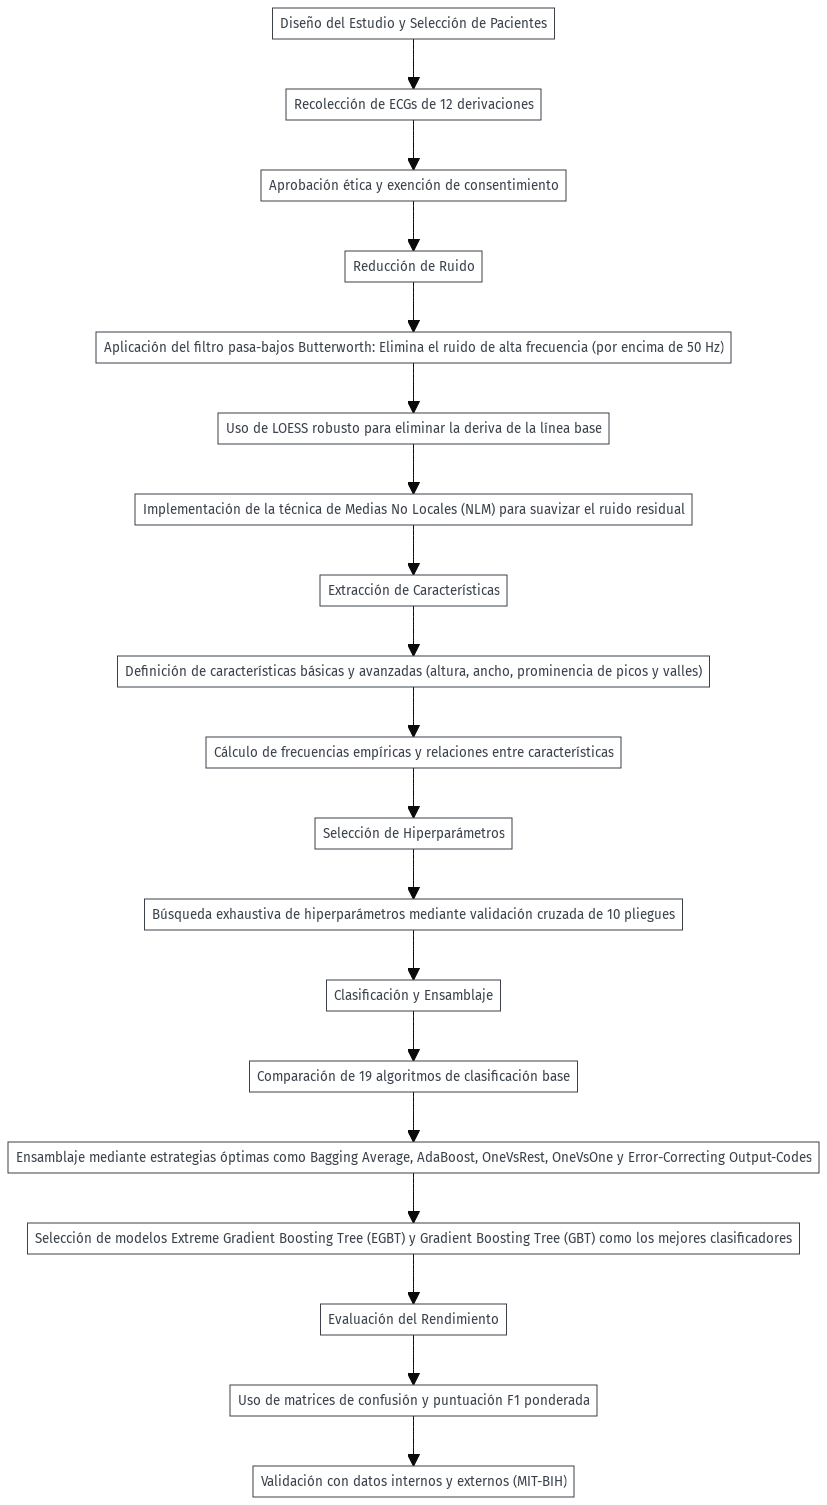

La metodología del estudio se basa en un conjunto de datos de 40,258 electrocardiogramas (ECG) de 12 derivaciones, recolectados entre 2013 y 2018 en hospitales participantes. Los pacientes fueron seleccionados aleatoriamente de un total de 120,000 sujetos, y el estudio incluyó tanto a personas con ritmos cardíacos normales como a aquellas con diversas arritmias y condiciones cardíacas adicionales. 

Para mejorar la calidad de los ECG, se implementó un enfoque de reducción de ruido en tres etapas. Primero, se aplicó un filtro pasa-bajos Butterworth para eliminar el ruido de alta frecuencia. Luego, se usó el método LOESS robusto para corregir la deambulación de la línea base. Finalmente, se implementó el algoritmo Non-Local Means (NLM) para eliminar el ruido residual, garantizando así que los datos de los ECG estuvieran lo más limpios posible para su análisis.

Para seleccionar los modelos óptimos, se llevó a cabo una exhaustiva búsqueda en malla de hiperparámetros, optimizando las métricas de rendimiento, particularmente el puntaje F1 promedio de una validación cruzada de 10 pliegues. Se evaluaron 19 algoritmos de clasificación base y cinco estrategias de ensamblaje, como el bagging y AdaBoost, lo que permitió identificar las configuraciones más efectivas.

Finalmente, se probaron varios modelos de clasificación, incluidos Decision Tree (DT), K-Nearest Neighbors (KNN), Gradient Boosting Tree (GBT) y Extreme Gradient Boosting Tree (EGBT).


*An Arrhythmia classification approach via deep learning using single-lead ECG without QRS wave detection*

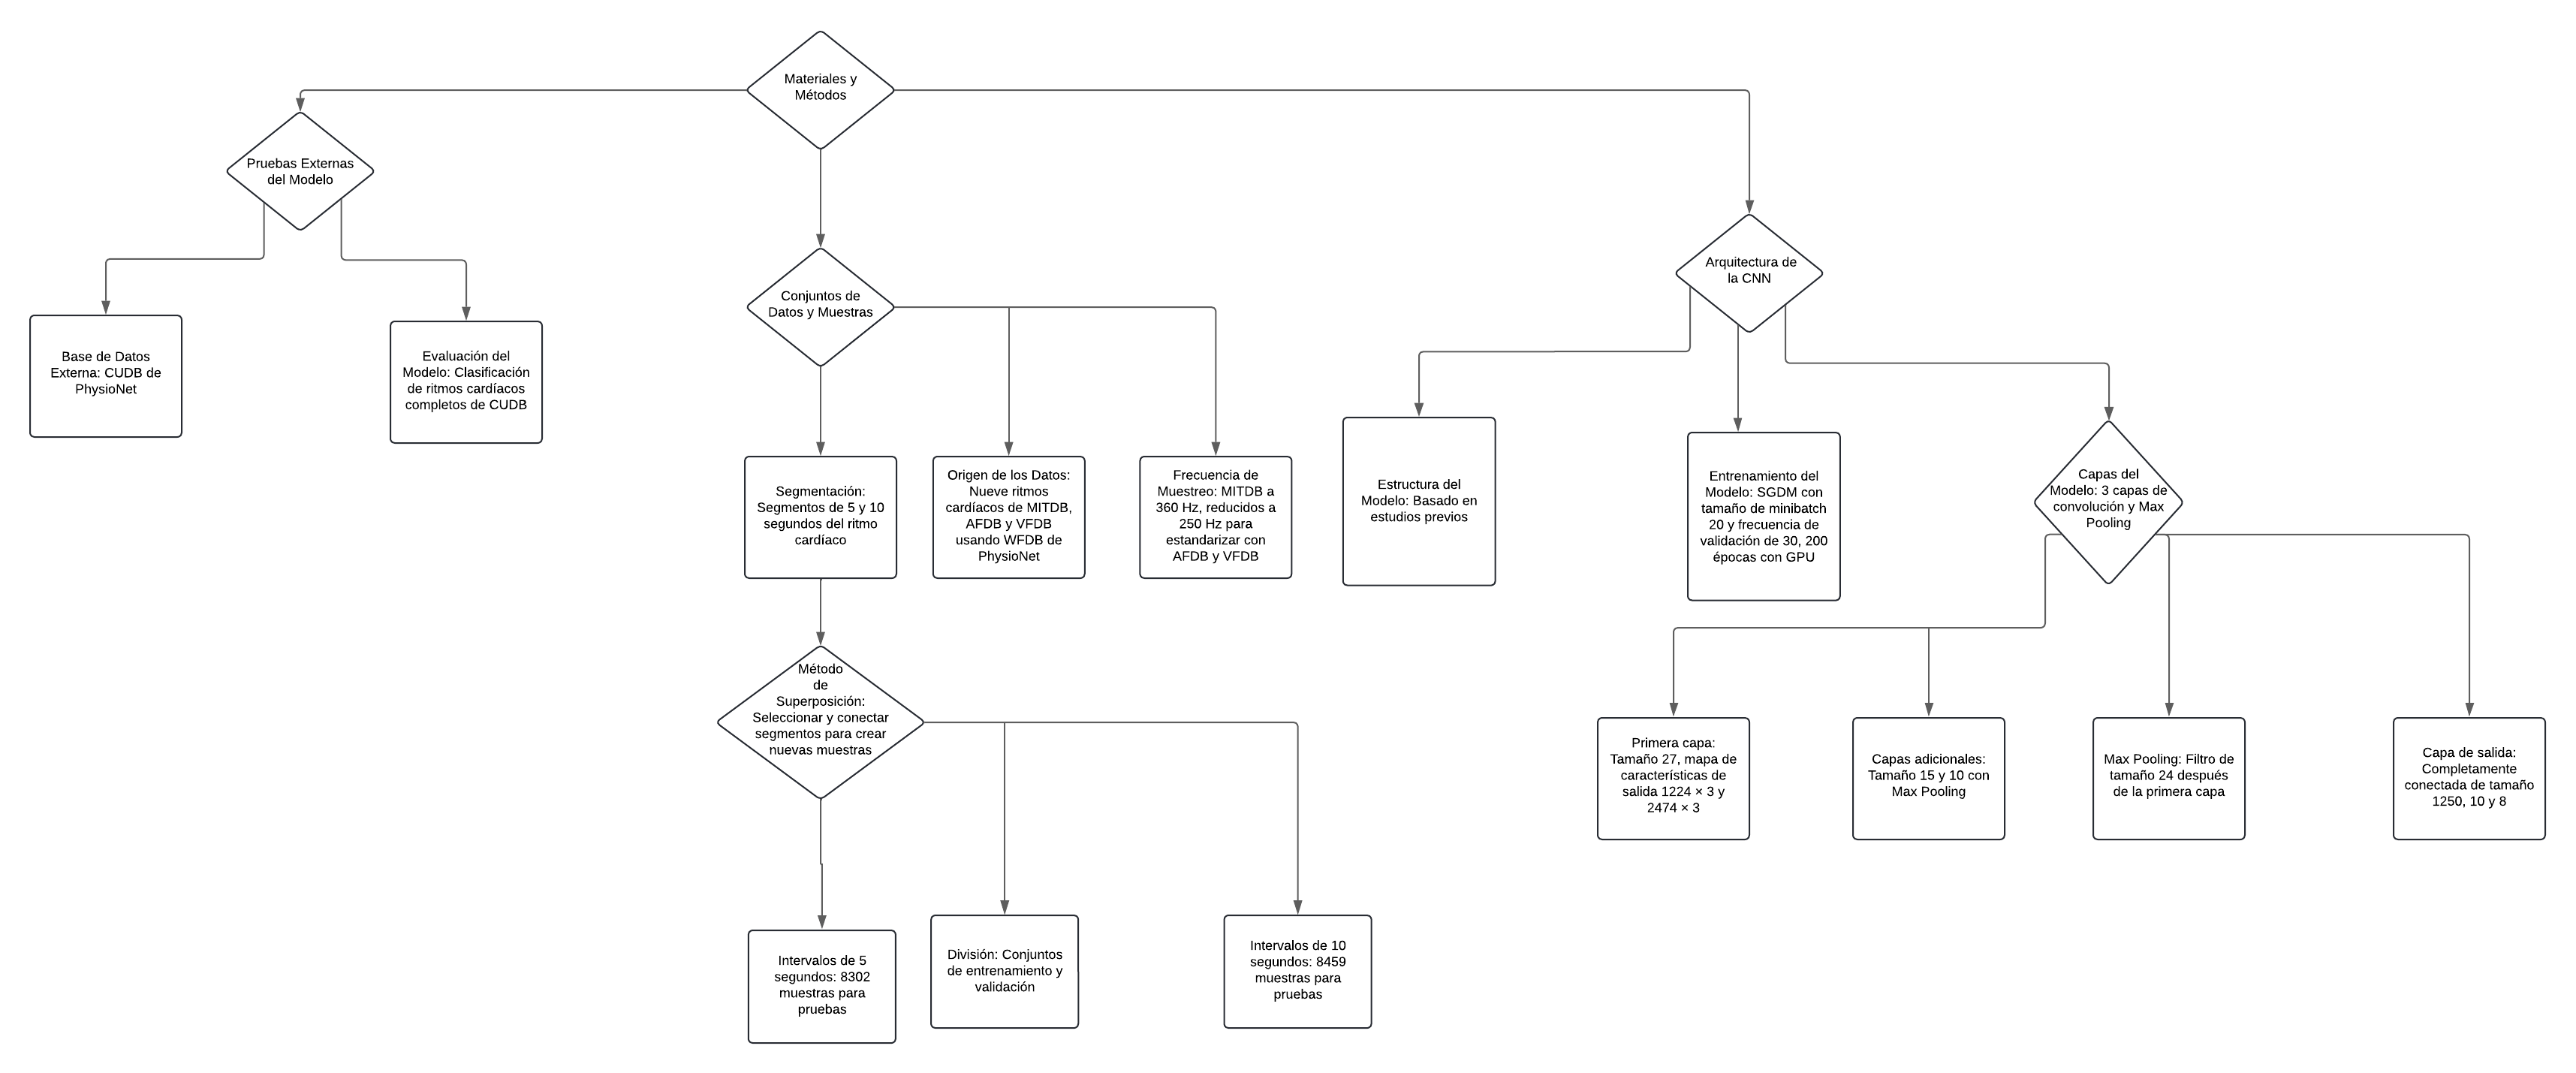

En el artículo se busca la clasificación de arritmias utilizando aprendizaje profundo con señales ECG de una sola derivación, sin necesidad de detectar la onda QRS. Tradicionalmente, la detección automática de arritmias ha dependido de la identificación de la onda QRS en el ECG. Sin embargo, en este estudio, se emplea una red neuronal convolucional (CNN) para clasificar diferentes tipos de arritmias sin este paso de detección.

Los datos utilizados provienen de bases de datos públicas accesibles en PhysioNet, incluyendo el MIT-BIH Arrhythmia Database, Atrial Fibrillation Database y MIT-BIH Ventricular Fibrillation Database. Los segmentos de ECG se dividieron en intervalos de 5 y 10 segundos, y se compararon los resultados. El modelo CNN mostró capacidad para diferenciar entre Ritmo Sinusal Normal (NSR) y varias arritmias, como Fibrilación Auricular (AFIB), Aleteo Auricular (AFL), síndrome de Wolff-Parkinson-White (WPW), Fibrilación Ventricular (VF), Taquicardia Ventricular (VT), Aleteo Ventricular (VFL), Bloqueo AV Mobitz II (MII) y Bradicardia Sinusal (SB)

El modelo CNN fue entrenado utilizando arquitectura convolucional con capas de Max Pooling y capas completamente conectadas para la clasificación. La evaluación del modelo se realizó en un conjunto de datos externo, el Creighton University Ventricular Tachyarrhythmia Database (CUDB), para simular condiciones reales. 

Este estudio demuestra que es posible detectar arritmias de manera efectiva utilizando dispositivos portátiles con una sola derivación ECG, lo que podría mejorar significativamente la intervención médica temprana en situaciones de emergencia. 


2. Descargar los datos ECGDataDenoised.zip de:
https://figshare.com/collections/ChapmanECG/4560497/1

De la base de datos extraer los registros que correspondan a bradicardia sinusal (SB Sinus Bradycardia) y fibrilación auricular (AFIB Atrial Fibrillation). Esta información está en el archivo Diagnostics.xlsx

In [2]:
import pandas as pd
import scipy.signal as sis
import os
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import random

In [3]:
diagnostics_path = 'Diagnostics.xlsx'
diagnostics_df = pd.read_excel(diagnostics_path)
sbyafib_df=diagnostics_df[diagnostics_df['Rhythm'].isin(['AFIB', 'SB'])]
needed_files = sbyafib_df['FileName'].tolist()

3. De estos registros los análisis para el presente proyecto deben hacerse en la derivación II

Programar las fórmulas 1 al 4 que se encuentran en el artículo (15%). Consultar que significado y utilidad del biespectro (Realice la gráfica) (5%)
https://arxiv.org/pdf/1809.08451


In [8]:
ruta = r'D:\Descargas\ECGDataDenoised\ECGDataDenoised'

### Biespectro

El bispectrum es una herramienta de análisis de señales que forma parte del análisis espectral de orden superior (Higher Order Spectral Analysis, HOSA). A diferencia del espectro de potencia tradicional, que analiza la distribución de la energía de una señal en función de la frecuencia, el bispectrum proporciona información adicional sobre las relaciones de fase entre las componentes frecuenciales de la señal.
El bispectrum es la transformación de Fourier de la función de autocorrelación de tercer orden de una señal. Matemáticamente, para una señal 
𝑥(𝑡), el bispectrum 𝐵 (𝑓1,𝑓2) se define como:

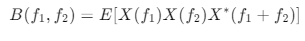 [1]

Se utiliza principalmente para:

* Detección de No Linealidades: El bispectrum es particularmente útil para detectar y caracterizar no linealidades en señales. Esto es posible porque las no linealidades generan acoplamiento de fase entre diferentes componentes frecuenciales, lo cual es capturado por el bispectrum.

* Identificación de Interacciones de Fase: A diferencia del espectro de potencia, que solo proporciona información sobre la magnitud de las componentes frecuenciales, el bispectrum también informa sobre las relaciones de fase entre estas componentes. Esto es crucial para entender las interacciones y acoplamientos en sistemas complejos.

* Reducción de Ruido: El bispectrum puede diferenciar entre señales de origen dinámico y componentes de ruido. Las componentes de ruido no muestran coherencia de fase, mientras que las componentes de señal sí lo hacen. Por lo tanto, el bispectrum puede ser utilizado para filtrar el ruido y extraer la señal de interés.

* Aplicaciones en Biomedicina: En el análisis de señales biomédicas, como ECG y EEG, el bispectrum se utiliza para detectar y caracterizar patrones asociados con diversas condiciones médicas, como arritmias cardíacas y epilepsia.

* 3.1.1 Detrending

Para este caso se utiliza una libreria ya definida (detrend), de la libreria scipy y se importo la función como sis (scipy.signal)

In [26]:
sis.detrend

<function scipy.signal._signaltools.detrend(data, axis=-1, type='linear', bp=0, overwrite_data=False)>

* 3.1.2 Compression

In [27]:
def compress(timeseries: np.ndarray) -> np.ndarray:
  """
    Normaliza la señal recibida, poniendola entre 0 y 1.
  """
  max = timeseries.max()
  min = timeseries.min()
  return (timeseries - min) / (max - min)

* 3.2 Power Spectral analysis


In [28]:
dff = pd.read_csv(f'{ruta}/{os.listdir(ruta)[0]}',delimiter=',',names=['I', 'II', 'III', 'aVR', 'aVL', 'aVF', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6'])['II']
dff.head()

0   -358.97
1   -336.81
2   -315.56
3   -296.23
4   -279.75
Name: II, dtype: float64

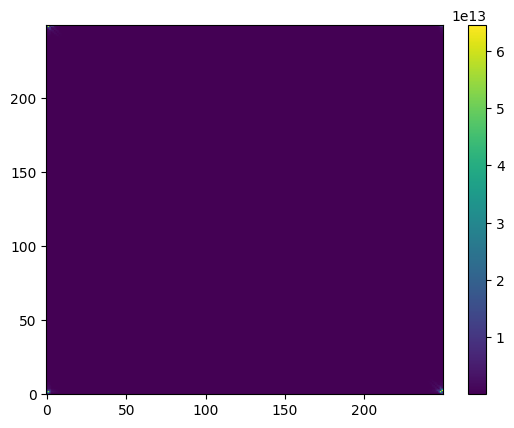

In [29]:
def Bispectrum(timeseries: np.ndarray, largo_segmento: int) -> np.ndarray:
  """
    Genera el bispectrum de la señal.
  """
  nsegmentos = int(np.ceil(len(timeseries) / largo_segmento))
  segmentos = np.array_split(timeseries, nsegmentos)
  bispectro = np.zeros((segmentos[0].size, segmentos[0].size), dtype = complex)
  for segmento in segmentos:
    X = np.fft.fft(segmento, n=len(segmento))
    F = np.fft.fftfreq(len(segmento), 1/500)

    # Crear una malla de índices para f1 y f2
    f1_indices, f2_indices = np.meshgrid(np.arange(segmento.size), np.arange(segmento.size), indexing='ij')
    
    # Calcular los índices f1_f2
    f1_f2_indices = (f1_indices + f2_indices) % segmento.size

    # Asegurarse de que todas las operaciones tienen las mismas dimensiones
    bispectro[f1_indices, f2_indices] += X[f1_indices] * X[f2_indices] * np.conj(X[f1_f2_indices])

  return bispectro, nsegmentos

sol, nsegmentos = Bispectrum(dff.to_numpy(), 250)
plt.imshow(np.abs(sol), aspect = 'auto', origin = 'lower')
plt.colorbar()
plt.show()

* 3.3 Higher Order Spectral Analysis


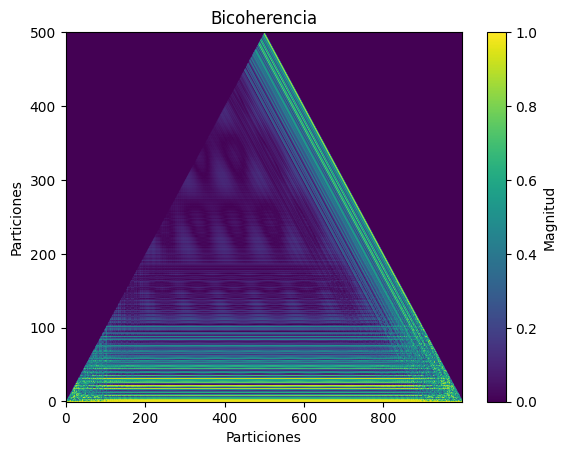

In [30]:
def Bicoherence(timeseries: np.ndarray, largo_segmento: int) -> np.ndarray:
  """
    Genera la bicoherencia de la señal.
  """
  bispectro, nsegmentos = Bispectrum(timeseries, largo_segmento)
  bicoherence = np.zeros((bispectro.shape[0], bispectro.shape[1]), dtype = complex)
  bicoherence[:, :] = bispectro / (np.abs(bispectro))

  
  bicoherence_simetric = np.zeros((bicoherence.shape[0], bicoherence.shape[1]), dtype = float)
  # Se aplica simetria
  for f1 in range(bicoherence.shape[0]):
    bicoherence_simetric[f1, f1:bicoherence.shape[1]-f1] = bicoherence[f1, f1:bicoherence.shape[1]-f1]


  return np.abs(bicoherence_simetric), nsegmentos

sol, nsegmentos = Bicoherence(dff, 1000)
plt.imshow(np.abs(sol), aspect = 'auto', origin = 'lower')
plt.colorbar(label = 'Magnitud')
plt.ylim([-0.5, sol.shape[1]/2+0.5])
plt.xlabel('Particiones')
plt.ylabel('Particiones')
plt.title('Bicoherencia')
plt.show()

4. Para cada señal extraer la frecuencia que contiene la máxima potencia y Gráfiquela (15%)

{'MFrecuencia': 2.6}

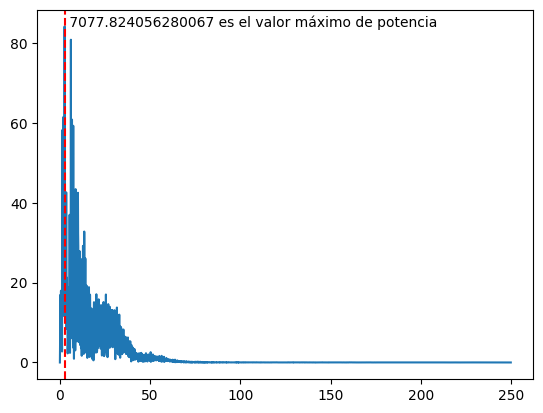

In [31]:
def extractNGraph(signal: np.ndarray, graph: bool = True) -> dict:
    FT = np.fft.fft(signal)
    FT = np.abs(FT[:len(FT)//2])
    freqs = np.fft.fftfreq(len(signal), 1/500)
    freqs = freqs[:len(freqs)//2]
    power = np.abs(FT)**2
    maxV = np.argmax(power)
    maxFf = round(freqs[maxV], 5)
    max = power[maxV]  
    maxF = FT[maxV]  
    if graph:   
        plt.figure()
        plt.plot(freqs, FT)
        plt.axvline(maxFf, color = 'r', linestyle = '--', label = 'Maxima Freq')
        plt.text(maxFf, maxF, f' {power[maxV]} es el valor máximo de potencia')
    return {'MFrecuencia' : maxFf}

s = sis.detrend(compress(sis.detrend(pd.read_csv(os.path.join(ruta, os.listdir(ruta)[95]), names=['I', 'II', 'III', 'aVR', 'aVL', 'aVF', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6'])['II'])))
extractNGraph(s)

5. Para cada señal sumar el número de frecuencias que son significativas para bicoherencia (cuales tienen un valor superior a 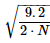 (20%)

In [32]:
def sumaFreqs(timeseries: np.ndarray, lengthSegmentos: int) -> int:
    '''
        Recibe un numpy array y longitud de los segmentos para posteriormente retornar
        un valor entero que da el numero de valores de frecuencia que son importantes
        para la bicoherencia.
    '''
    B, N = Bicoherence(timeseries, lengthSegmentos)
    return {'NFrecuencias' : np.sum(B > np.sqrt(9.2/(2*N)))}

sumaFreqs(dff, 1000)

{'NFrecuencias': 6529}

6. Crear una rutina que aplique sobre todos los archivos de la base de datos las rutina 3 al 5 y almacene los resultados en un dataframe donde se pueda registro, tipo de patología y el frecuencia de máxima potencia (fMP) y suma de frecuencias significativas en bicoherencia (sFSB):

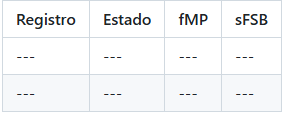

In [33]:
dataframe = pd.DataFrame(columns=['patologia', 'MFrecuencia', 'NFrecuencias'])
def FullDF(lista: list[str], n: int = 5):
    a = 0
    for i in lista:
        csv = sis.detrend(compress(sis.detrend(pd.read_csv(os.path.join(ruta, i), names=['I', 'II', 'III', 'aVR', 'aVL', 'aVF', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6'])['II'])))
        row = diagnostics_df[diagnostics_df.FileName == i.split('.')[0]]
        name = row.FileName.to_numpy()[0]
        patologia = row.Rhythm.to_numpy()[0]
        maximos = extractNGraph(csv, graph = False)
        sumas = sumaFreqs(csv, 500)
        total = {
            'patologia': patologia
        }
        total.update(maximos)
        total.update(sumas)
        dataframe.loc[name] = total
        a+=1
        print(f'{a}/{n}')
        if a == n:
            return dataframe
listaa = os.listdir(ruta)
FullDF(listaa)

1/5
2/5
3/5
4/5
5/5


,patologia,MFrecuencia,NFrecuencias
MUSE_20180111_155115_19000,ST,2.1,4500
MUSE_20180111_155154_74000,AFIB,9.7,31044
MUSE_20180111_155203_15000,AFIB,2.7,34160
MUSE_20180111_155249_70000,ST,3.9,8936
MUSE_20180111_155542_84000,AF,3.4,32817


7. Para las señales de análisis del punto 2 aplicar las rutinas del punto 3 al 5 y hacer un informe que permita evidenciar las diferencias entre las señales SB y AFIB utilizando las herramientas de estadística descriptiva (5%)

In [15]:
listaF = [i for i in os.listdir(ruta) if i.split('.')[0] in needed_files]
senal = FullDF(listaF, len(listaF))

1/5669
2/5669
3/5669
4/5669
5/5669
6/5669
7/5669
8/5669
9/5669
10/5669
11/5669
12/5669
13/5669
14/5669
15/5669
16/5669
17/5669
18/5669
19/5669
20/5669
21/5669
22/5669
23/5669
24/5669
25/5669
26/5669
27/5669
28/5669
29/5669
30/5669
31/5669
32/5669
33/5669
34/5669
35/5669
36/5669
37/5669
38/5669
39/5669
40/5669
41/5669
42/5669
43/5669
44/5669
45/5669
46/5669
47/5669
48/5669
49/5669
50/5669
51/5669
52/5669
53/5669
54/5669
55/5669
56/5669
57/5669
58/5669
59/5669
60/5669
61/5669
62/5669
63/5669
64/5669
65/5669
66/5669
67/5669
68/5669
69/5669
70/5669
71/5669
72/5669
73/5669
74/5669
75/5669
76/5669
77/5669
78/5669
79/5669
80/5669
81/5669
82/5669
83/5669
84/5669
85/5669
86/5669
87/5669
88/5669
89/5669
90/5669
91/5669
92/5669
93/5669
94/5669
95/5669
96/5669
97/5669
98/5669
99/5669
100/5669
101/5669
102/5669
103/5669
104/5669
105/5669
106/5669
107/5669
108/5669
109/5669
110/5669
111/5669
112/5669
113/5669
114/5669
115/5669
116/5669
117/5669
118/5669
119/5669
120/5669
121/5669
122/5669
123/5669
1

In [23]:
senal.to_csv(os.path.join(os.getcwd(), 'datos.csv'), index = False)

In [24]:
senal = pd.read_csv(os.path.join(os.getcwd(), 'datos.csv'))
senal

,patologia,MFrecuencia,NFrecuencias
0,ST,2.1,4500
1,AFIB,9.7,31044
2,AFIB,2.7,34160
3,ST,3.9,8936
4,AF,3.4,32817
...,...,...,...
5667,AFIB,12.4,31304
5668,AFIB,3.9,27056
5669,AFIB,3.2,22794
5670,AFIB,4.1,20021


In [25]:
a, b = senal.groupby('patologia')

ValueError: too many values to unpack (expected 2)

In [19]:
a[1]

NameError: name 'a' is not defined

In [57]:
b[1]

,patologia,MFrecuencia,NFrecuencias
2,SB,3.7,8482
3,SB,2.9,19772
4,SB,2.8,21063
6,SB,2.8,30629
8,SB,0.8,26386
...,...,...,...
5526,SB,5.7,24499
5528,SB,2.5,26190
5533,SB,6.9,33542
5534,SB,1.9,24353


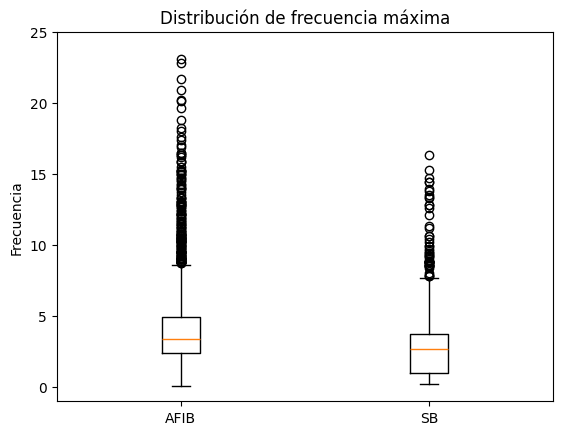

In [73]:
plt.figure()
plt.boxplot([a[1].MFrecuencia, b[1].MFrecuencia], labels = [a[0], b[0]])
plt.ylabel('Frecuencia')
plt.title('Distribución de frecuencia máxima')
# Consideramos el valor cercano a 50 como un atipico ya que es el único
plt.ylim([-1, 25])
plt.show()

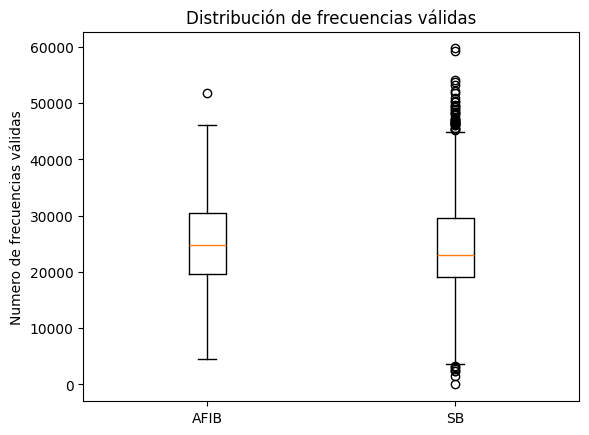

In [69]:
plt.figure()
plt.boxplot([a[1].NFrecuencias, b[1].NFrecuencias], labels = [a[0], b[0]])
plt.title('Distribución de frecuencias válidas')
plt.ylabel('Numero de frecuencias válidas')
plt.show()

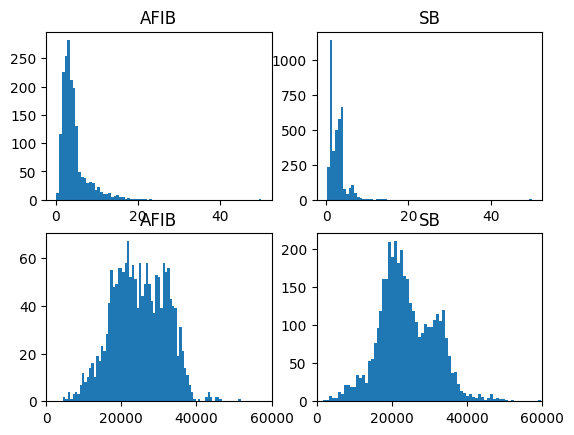

In [164]:
plt.subplot(2,2,1)
plt.hist(a[1].MFrecuencia, bins = 75)
plt.title(a[0])
plt.subplot(2,2,2)
plt.hist(b[1].MFrecuencia, bins = 75)
plt.title(b[0])
plt.subplot(2,2,3)
plt.hist(a[1].NFrecuencias, bins = 75)
plt.xlim([-10, 60000])
plt.title(a[0])
plt.subplot(2,2,4)
plt.hist(b[1].NFrecuencias, bins = 75)
plt.xlim([-10, 60000])
plt.title(b[0])
plt.show()

Aqui empezamos a realizar un analisis de la estadistica descriptiva de las señales, que sería las medias y desviaciones

In [182]:
def FullDF2(lista: list[str]):
    dataframe = pd.DataFrame(columns=['patologia', 'media', 'mediana', 'desviacion'])
    a = 0
    for i in lista:
        csv = sis.detrend(pd.read_csv(os.path.join(ruta, i), names=['I', 'II', 'III', 'aVR', 'aVL', 'aVF', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6'])['II'])
        row = diagnostics_df[diagnostics_df.FileName == i.split('.')[0]]
        name = row.FileName.to_numpy()[0]
        patologia = row.Rhythm.to_numpy()[0]
        media = np.mean(csv)
        mediana = np.median(csv)
        desviacion = np.std(csv)
        total = {
            'patologia': patologia,
            'media' : media,
            'mediana' : mediana,
            'desviacion' : desviacion
        }
        dataframe.loc[name] = total
    return dataframe

listaa = os.listdir(ruta)
estadisticos = FullDF2(listaa)
estadisticos.head()

,patologia,media,mediana,desviacion
MUSE_20180111_155154_74000,AFIB,1.969056e-14,-24.793280,103.598862
MUSE_20180111_155203_15000,AFIB,1.055014e-14,-25.347593,95.821865
MUSE_20180111_155758_17000,SB,2.710294e-14,-37.110762,141.481733
MUSE_20180111_155839_67000,SB,3.137757e-15,-14.297191,56.671764
MUSE_20180111_155859_36000,SB,2.310117e-14,-22.722596,90.717890


In [194]:
(cn, c), (dn, d) = estadisticos.groupby('patologia')

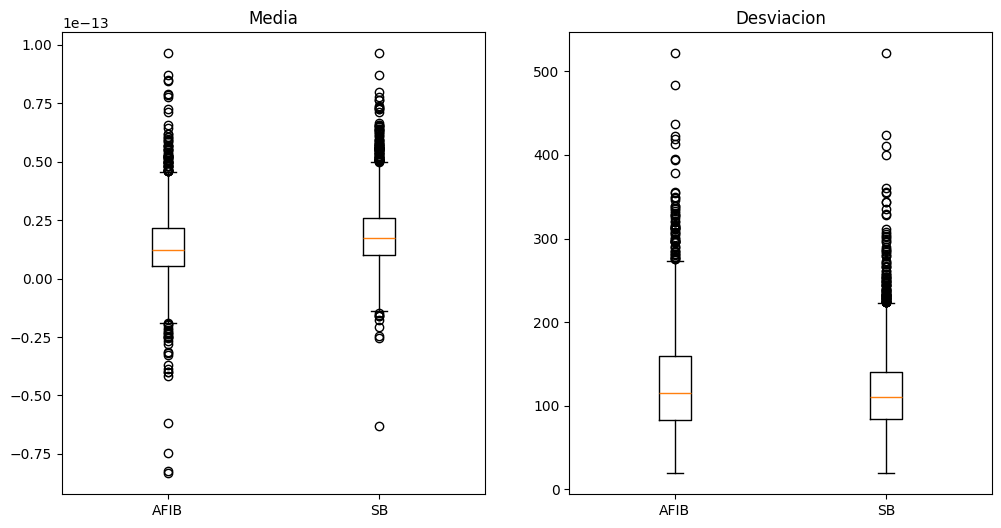

In [213]:
fig, ax = plt.subplots(1, 2, figsize = (12, 6))
ax[0].boxplot([c.media, d. media], labels = [cn, dn])
ax[0].set_title('Media')
ax[1].boxplot([c.desviacion, d. desviacion], labels = [cn, dn])
ax[1].set_title('Desviacion')
plt.show()

Los datos de estadistica descriptiva obtenidos muestran que los datos obtenidos tienen altas similitudes entre ellos, si bien no son exactamente iguales, los datos de media y desviación estandar, son bastante similares entre ellos, entre los diferentes problemas cardiacos no parece haber a primera vista alguna diferencia importante entre los valores presentes.

Aún asi para comprobar finalmente se utilizará estadistica inferencial.

In [214]:
def pruebaT_U(data1: np.ndarray, data2: np.ndarray) -> bool:
    '''
    Prueba si un ndarray es cumple los requisitos para hacer una prueba T de student o 
    en caso contrario se requiere hacer una prueba U de Mann-Whitney
    
    Se retorna un True en caso de que se pueda hacer una prueba T y falso en caso contrario.
    '''
    _, pV_1 = stats.shapiro(data1)
    _, pV_2 = stats.shapiro(data2)
    if pV_1 < 0.05 or pV_2 < 0.05:
        return False
    
    _, pV_3 = stats.levene(data1, data2)

    if pV_3 < 0.05:
        return False

    return True

Debido a que hay diferentes numero de datos y para evitar que esto afecte el resultado, se tomarán muestras aleatorias 5 veces para que ambos arreglos de datos tengan la misma longitud de datos y con cada una se hará pruebas.

In [217]:
n = len(c.media)
print('Media')
for i in range(5):
    toma_aleatoria = random.sample(list(d.media.to_numpy()), n)
    print(pruebaT_U(c.media, toma_aleatoria))

print('Desviacion')
for i in range(5):
    toma_aleatoria = random.sample(list(d.desviacion.to_numpy()), n)
    print(pruebaT_U(c.desviacion, toma_aleatoria))

Media
False
False
False
False
False
Desviacion
False
False
False
False
False


Procedemos a usar pruebas U de Mann-Whithney

In [229]:
print('Media')
n = len(c.media)
for i in range(5):
    toma_aleatoria = np.array(random.sample(list(d.media.to_numpy()), n))
    estadistico, p_value = stats.mannwhitneyu(c.media, toma_aleatoria)
    print(p_value)
    if p_value > 0.05:
        print(f'No hay diferencias significativas en las medias (no se rechaza H0)')
    else:
        print(f'Hay diferencias significativas en las medias (se rechaza H0)')

Media
4.7920962243131435e-29
Hay diferencias significativas en las medias (se rechaza H0)
2.805592228457203e-35
Hay diferencias significativas en las medias (se rechaza H0)
7.54271193937518e-33
Hay diferencias significativas en las medias (se rechaza H0)
8.811220411075061e-31
Hay diferencias significativas en las medias (se rechaza H0)
4.3850154177465226e-33
Hay diferencias significativas en las medias (se rechaza H0)


In [230]:
print('Desviacion')
n = len(c.desviacion)
for i in range(5):
    toma_aleatoria = np.array(random.sample(list(d.desviacion.to_numpy()), n))
    estadistico, p_value = stats.mannwhitneyu(c.desviacion, toma_aleatoria)
    print(p_value)
    if p_value > 0.05:
        print(f'No hay diferencias significativas en las desviaciones (no se rechaza H0)')
    else:
        print(f'Hay diferencias significativas en las desviaciones (se rechaza H0)')

Desviacion
3.990614401311082e-05
Hay diferencias significativas en las desviaciones (se rechaza H0)
4.288556659558023e-05
Hay diferencias significativas en las desviaciones (se rechaza H0)
0.00015922483780568693
Hay diferencias significativas en las desviaciones (se rechaza H0)
7.690997106935141e-05
Hay diferencias significativas en las desviaciones (se rechaza H0)
3.589690937820604e-05
Hay diferencias significativas en las desviaciones (se rechaza H0)


Para comenzar, hay que tener en cuenta que la prueba U de Mann-Whitneyaporta información sobre las diferencias existentes entre las medianas de ambos grupos. Ahora bien, a pesar de que los datos anteriores mostraban una baja diferencia entre ellos de forma gráfica y que de hecho las distribuciones se encontraban en rangos muy similares, incluyendo sus rangos intercuartilicos y cercania entre sus medianas, aún asi al realizar las pruebas de hipotesis U de Mann-Whitney se cencontraron que  hay diferencias significativas.

Para el caso de la media, los valores p son extremadamente bajos  lo que indica las diferencias estadísticamente significativas en las medias de las señales de ECG entre fibrilación auricular (AFIB) y bradicardia sinusal (SB). Indicando que las características estadísticas de los grupos son significativamente distintas. Las diferencias en las medias pueden implicar que los patrones de actividad eléctrica en los corazones de pacientes con AFIB y SB tienen características únicas que podrían ser relevantes para el diagnóstico y el tratamiento.

Por último, la desviación también evidenció diferencias. Las diferencias en las desviaciones pueden implicar que la estabilidad de la actividad eléctrica del corazón varía entre AFIB y SB. Esto puede ser relevante para entender el comportamiento del ritmo cardíaco y los riesgos asociados. Por ejemplo, una mayor desviación en AFIB puede reflejar un patrón más errático en la actividad eléctrica, lo que es característico de esta condición.


8. Indicar si hay o no diferencias estadísticas entre las características espectrales del punto 4 y 5 para las dos poblaciones de estudio (5%)

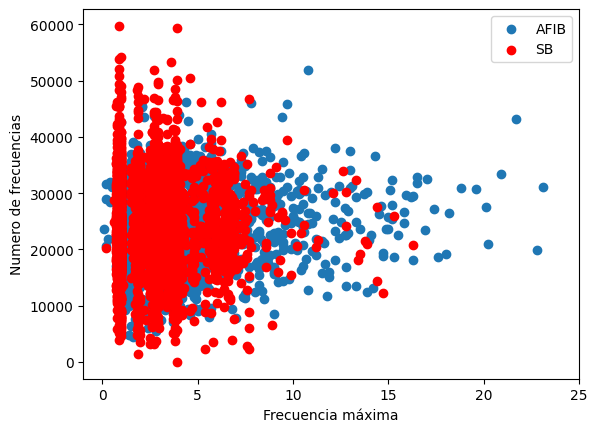

In [163]:
plt.figure()
plt.scatter(a[1].MFrecuencia, a[1].NFrecuencias)
plt.scatter(b[1].MFrecuencia, b[1].NFrecuencias, color = 'red')
plt.legend([a[0], b[0]])
plt.xlabel('Frecuencia máxima')
plt.ylabel('Numero de frecuencias')
plt.xlim([-1,25])
plt.show()

In [235]:
print(a[1].MFrecuencia.mean(), '   ', b[1].MFrecuencia.mean())
print(a[1].NFrecuencias.mean(), '   ', b[1].NFrecuencias.mean())
print(a[1].MFrecuencia.std(), '   ', b[1].MFrecuencia.std())
print(a[1].NFrecuencias.std(), '   ', b[1].NFrecuencias.std())
print(np.ptp(a[1].MFrecuencia), '   ', np.ptp(b[1].MFrecuencia))
print(np.ptp(a[1].NFrecuencias), '   ', np.ptp(b[1].NFrecuencias))

4.289662921348315     2.6920787040370273
24784.975280898878     24065.997171509385
3.2836873286042976     2.3801131770690187
7122.46736017419     7584.6351148118965
49.9     49.8
47292     59717


La gráfica de dispersión revela una relación compleja entre la frecuencia máxima y el número de frecuencias en las señales AFIB y SB. Si bien existe una tendencia general a que un mayor número de frecuencias se asocie con una frecuencia máxima más elevada, esta relación no sigue un patrón lineal perfecto. Esto indica que otros factores, además de la frecuencia máxima, influyen en la distribución de las frecuencias en estas señales.

Al comparar los dos grupos, AFIB y SB, se observa que presentan patrones de dispersión distintivos. Esta diferencia en la distribución de los puntos sugiere que las señales AFIB y SB poseen características espectrales fundamentalmente diferentes. Es decir, la composición frecuencial de estas señales no es aleatoria y presenta patrones característicos que permiten diferenciarlas. Estos hallazgos preliminares respaldan la hipótesis de que el análisis espectral puede ser una herramienta útil para la clasificación y el diagnóstico de las señales AFIB y SB.

Se realizan las pruebas de hipotesis para poder confirmar si se puede hacer una prueba T de student o una prueba U de Mann-Whitney.

Debido a que hay diferentes numero de datos y para evitar que esto afecte el resultado, se tomarán muestras aleatorias 5 veces para que ambos arreglos de datos tengan la misma longitud de datos y con cada una se hará pruebas.

In [158]:
n = len(a[1].MFrecuencia)
print('MFrecuencia')
for i in range(5):
    toma_aleatoria = random.sample(list(b[1].MFrecuencia.to_numpy()), n)
    print(pruebaT_U(a[1].MFrecuencia, toma_aleatoria))

print('NFrecuencias')
for i in range(5):
    toma_aleatoria = random.sample(list(b[1].NFrecuencias.to_numpy()), n)
    print(pruebaT_U(a[1].NFrecuencias, toma_aleatoria))

MFrecuencia
False
False
False
False
False
NFrecuencias
False
False
False
False
False


Se procede entonces a utilizar pruebas U de Mann-Whitney.

In [116]:
n = len(a[1].MFrecuencia)
for i in range(5):
    toma_aleatoria = np.array(random.sample(list(b[1].MFrecuencia.to_numpy()), n))
    estadistico, p_value = stats.mannwhitneyu(a[1].MFrecuencia, toma_aleatoria)
    print(p_value)
    if p_value > 0.05:
        print(f'No hay diferencias significativas en la frecuencia máxima de AFIB y SB(no se rechaza H0)')
    else:
        print(f'Hay diferencias significativas en la frecuencia máxima de AFIB y SB (se rechaza H0)')

2.6815677556762465e-89
Hay diferencias significativas en la frecuencia máxima (se rechaza H0)
7.252361678686429e-88
Hay diferencias significativas en la frecuencia máxima (se rechaza H0)
2.32320210958562e-86
Hay diferencias significativas en la frecuencia máxima (se rechaza H0)
4.939135103024067e-80
Hay diferencias significativas en la frecuencia máxima (se rechaza H0)
8.535211495997461e-91
Hay diferencias significativas en la frecuencia máxima (se rechaza H0)


In [126]:
n = len(a[1].NFrecuencias)
for i in range(5):
    toma_aleatoria = np.array(random.sample(list(b[1].NFrecuencias.to_numpy()), n))
    estadistico, p_value = stats.mannwhitneyu(a[1].NFrecuencias, toma_aleatoria)
    print(p_value)
    if p_value > 0.05:
        print(f'No hay diferencias significativas en el número de frecuencias (no se rechaza H0)')
    else:
        print(f'Hay diferencias significativas en el número de frecuencias (se rechaza H0)')


0.0031923607051310547
Hay diferencias significativas en el número de frecuencias (se rechaza H0)
0.002703166084360976
Hay diferencias significativas en el número de frecuencias (se rechaza H0)
8.820399938605333e-05
Hay diferencias significativas en el número de frecuencias (se rechaza H0)
0.005983823360765908
Hay diferencias significativas en el número de frecuencias (se rechaza H0)
0.014547757174923027
Hay diferencias significativas en el número de frecuencias (se rechaza H0)


Se evidencia estadisticamente que las diferencias SI son significativas en los resultados espectrales obtenidos, aún así es destacable que se nota mucho que las distribuciones se encuentran en zonas muy similares, pero con la diferencia importantisima de que los pacientes con bradicardia sinusal tienen mas datos y mas aglomerados, mientras que los pacientes con fibrilación auricular tienden a tener sus datos mas distribuidos a pesar de tener menor cantidad. 

Tambien se observa que los datos obtenidos de media, desviación estandar y el rango de los datos se encuentran en su mayoria bastante similares, a pesar de que la prueba estadistica dice que hay diferencias signiticativas.

En cuanto a las pruebas realizadas para la frecuencia máxima se obtuvieron valores p muy bajos por lo que no hay duda de que existen diferencias entre los valores de frecuencia maxima esto indica que estas dos condiciones cardíacas pueden tener características eléctricas distintas que son medibles y cuantificables.La fibrilación auricular, que se caracteriza por un ritmo cardíaco irregular y a menudo acelerado, puede reflejarse en frecuencias máximas más altas en comparación con la bradicardia sinusal, que se caracteriza por un ritmo cardíaco más lento. Como se encuentra en el articulo de referencia, "se observa que las variaciones de canal a canal son mucho más evidentes para los casos de enfermedad. El origen de estas frecuencias adicionales se puede rastrear hasta las irregularidades en los ritmos cardíacos, lo que indica una reducción en los mecanismos de autorregulación subyacentes que mantienen un corazón normal latiendo en un cierto patrón regular" 

Por otra parte, el numero de frecuencias también  se encontraron diferencias significativas reforzando la idea de que estas condiciones cardíacas presentan características distintivas en su actividad eléctrica. Las diferencias en el número de frecuencias pueden ser indicativas de la naturaleza diferente de la actividad eléctrica en el corazón durante estas dos condiciones. Por ejemplo, la fibrilación auricular, al ser un ritmo cardíaco irregular, podría asociarse con un mayor número de frecuencias en comparación con la bradicardia sinusal.

Ambas características de las señales pueden ser potenciales biomarcadores debido a las diferencias encontradas al hacer la comparación de las dos muestras.

9.Hacer un informe con todos los puntos anteriores (15%)

Trabajo sin sustentar no se califica

## **Conclusiones**


* Las diferencias observadas en la estructura frecuencial entre la fibrilación auricular y la bradicardia sinusal sugieren que estas condiciones presentan características eléctricas claramente diferenciables. Las irregularidades y el mayor número de frecuencias presentes en la fibrilación auricular pueden ser un reflejo de los procesos patológicos subyacentes que interfieren con la regulación normal del ritmo cardíaco.

* Al indagar sobre las diferencias sgnificativas entre las desviaciones y las medias se encontraron que ambas son medidas estadisticas que caracterizan cada una de las condiciones evaluadas y pueden funcionar como potencianles biomarcadores.

# **Bibliografía**

[1] Mariño, W. A. (2016). BIESPECTRO. www.academia.edu. https://www.academia.edu/28141592/BIESPECTRO 